<a href="https://colab.research.google.com/github/Pabitra-M/DataScience/blob/main/notebooks/ml_models/Polynomial_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

## quadratic equation used y = 0.5x^2 + 1.5x + 2+outliers

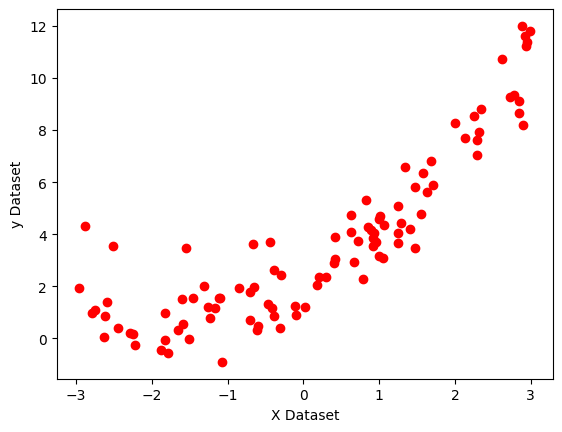

In [7]:
plt.scatter(X,y, color='r')
plt.xlabel('X Dataset')
plt.ylabel('y Dataset')
plt.show()

In [8]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
## lets implement simple linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [12]:
regression_1.fit(X_train, y_train)

LinearRegression()

In [13]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
print(score)

0.6500446209985892


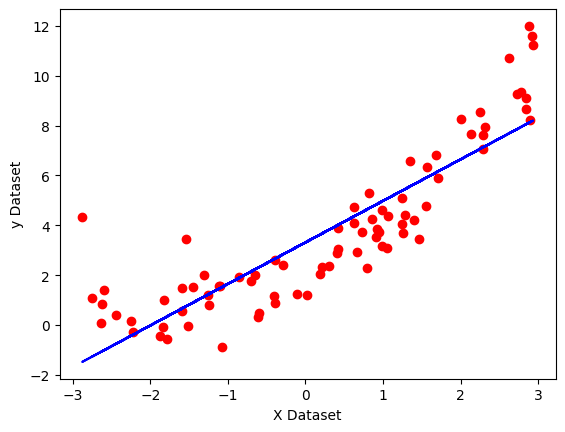

In [14]:
## visualize model
plt.scatter(X_train, y_train, color='r')
plt.plot(X_train, regression_1.predict(X_train), color='b')
plt.xlabel('X Dataset')
plt.ylabel('y Dataset')
plt.show()


In [15]:
## apply polinomial regressinon
from sklearn.preprocessing import PolynomialFeatures


In [16]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_text_poly = poly.transform(X_test)

In [17]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_text_poly)
score_2 = r2_score(y_test, y_pred)
print(score_2)

0.8976865578862511


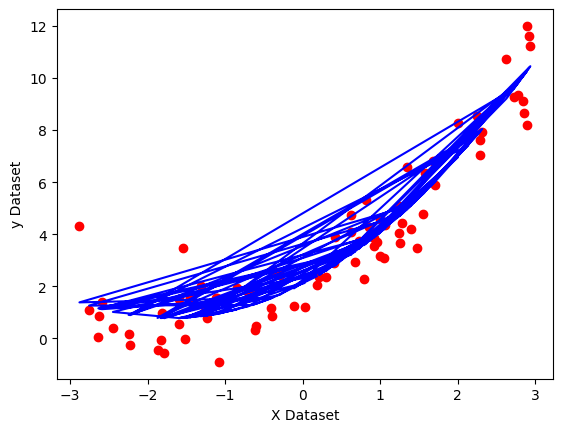

In [20]:
plt.scatter(X_train, y_train, color='r')
plt.plot(X_train, regression.predict(X_train_poly), color='b')
plt.xlabel('X Dataset')
plt.ylabel('y Dataset')
plt.show()
#

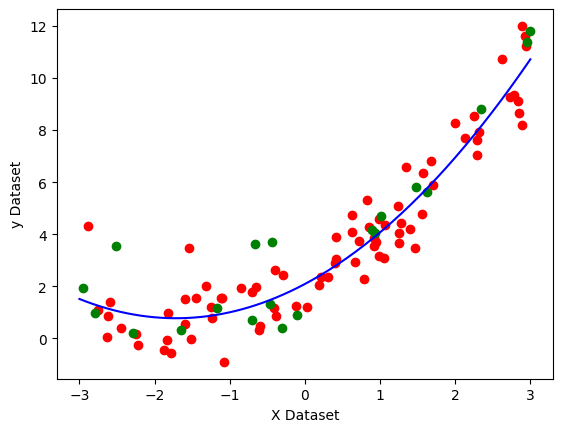

In [24]:
## prediction of new data
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, color='b')
plt.scatter(X_train, y_train, color='r')
plt.scatter(X_test, y_test, color='g')
plt.xlabel('X Dataset')
plt.ylabel('y Dataset')
plt.show()

# Pipeline concept

In [25]:
from sklearn.pipeline import Pipeline

In [37]:
def poly_regression(degree):
  X_new = np.linspace(-3, 3, 200).reshape(200, 1)
  poly_features = PolynomialFeatures(degree=degree, include_bias=True)
  lin_reg = LinearRegression()
  pipeline = Pipeline([('poly_features', poly_features), ('lin_reg', lin_reg)])
  pipeline.fit(X_train, y_train)

  y_new = pipeline.predict(X_new)


  # plotting prediction data
  plt.plot(X_new, y_new, color='r', label = 'degree' + str(degree), linewidth=3)
  plt.scatter(X_train, y_train, color='b', linewidths=3)
  plt.scatter(X_test, y_test, color='g', linewidths=3)
  plt.legend(loc="upper left")
  plt.xlabel('X Dataset')
  plt.ylabel('y Dataset')
  plt.axis([-4,4,0,10])
  plt.show()

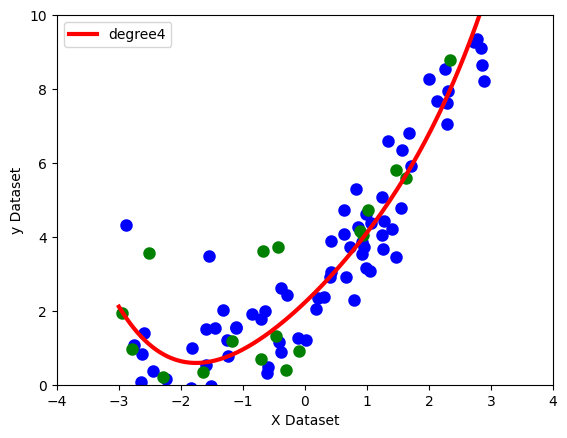

In [41]:
poly_regression(4)

In [ ]:
|